In [9]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
#from tigerml.eda import Analyser


In [4]:
df1=pd.read_csv("imdb.csv",escapechar='\\')

In [3]:
df2=pd.read_csv('movie_metadata.csv')

In [6]:
df1.columns

Index(['fn', 'tid', 'title', 'wordsInTitle', 'url', 'imdbRating',
       'ratingCount', 'duration', 'year', 'type', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
       'nrOfGenre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western'],
      dtype='object')

In [11]:
df1.head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0


taking insights from imdb data

In [12]:
df1.shape

(14761, 44)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14761 entries, 0 to 14760
Data columns (total 44 columns):
fn                  14761 non-null object
tid                 14761 non-null object
title               14761 non-null object
wordsInTitle        14748 non-null object
url                 14761 non-null object
imdbRating          13551 non-null float64
ratingCount         13551 non-null float64
duration            13745 non-null float64
year                14731 non-null float64
type                14761 non-null object
nrOfWins            14761 non-null int64
nrOfNominations     14761 non-null int64
nrOfPhotos          14761 non-null int64
nrOfNewsArticles    14761 non-null int64
nrOfUserReviews     14761 non-null int64
nrOfGenre           14761 non-null int64
Action              14761 non-null int64
Adult               14761 non-null int64
Adventure           14761 non-null int64
Animation           14761 non-null int64
Biography           14761 non-null int64
Comedy          

In [8]:
df1.dtypes

fn                   object
tid                  object
title                object
wordsInTitle         object
url                  object
imdbRating          float64
ratingCount         float64
duration            float64
year                float64
type                 object
nrOfWins              int64
nrOfNominations       int64
nrOfPhotos            int64
nrOfNewsArticles      int64
nrOfUserReviews       int64
nrOfGenre             int64
Action                int64
Adult                 int64
Adventure             int64
Animation             int64
Biography             int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Family                int64
Fantasy               int64
FilmNoir              int64
GameShow              int64
History               int64
Horror                int64
Music                 int64
Musical               int64
Mystery               int64
News                  int64
RealityTV           

In [18]:
df1.describe()

,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
count,13551.000000,1.355100e+04,13745.000000,14731.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,...,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000
mean,6.865707,2.642480e+04,5424.595417,1990.691263,3.090509,4.511754,23.545830,248.223630,103.239550,2.232234,...,0.010839,0.008604,0.127227,0.066798,0.037735,0.016056,0.036109,0.089493,0.032112,0.022153
std,1.119515,6.506456e+04,2784.823414,22.220563,9.226644,16.182953,65.285788,1051.247069,229.107375,0.828764,...,0.103550,0.092360,0.333239,0.249680,0.190560,0.125694,0.186567,0.285463,0.176303,0.147186
min,1.000000,5.000000e+00,2.000000,1888.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.300000,6.025000e+02,3720.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,3.977000e+03,5700.000000,1999.000000,0.000000,0.000000,7.000000,8.000000,30.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.600000,2.085850e+04,6660.000000,2007.000000,2.000000,3.000000,26.000000,101.000000,103.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000,1.183395e+06,68400.000000,2017.000000,226.000000,542.000000,2810.000000,32345.000000,4928.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


mean duration is approx 5424

mean imdbrating is 6.8 and many more we can get from this matrix

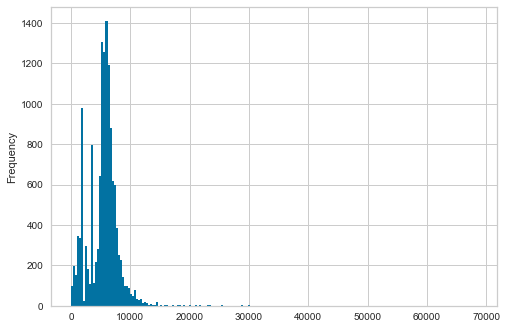

In [35]:
df1['duration'].plot(kind='hist', bins=200)

most of the movies duration is in between 4500 to 7000

same thing we can also see using box plot

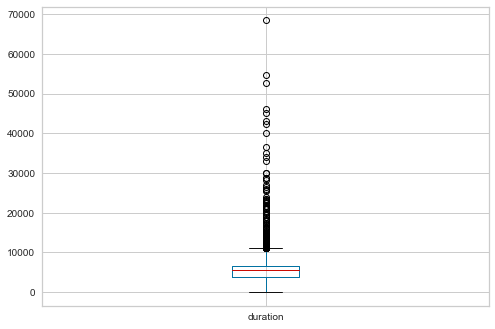

In [37]:
df1['duration'].plot(kind='box')

In [38]:
df1.corr()

,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
imdbRating,1.000000,0.155587,0.002109,-0.107825,0.196628,0.133735,0.077739,0.077474,0.079264,-0.000752,...,-0.044206,-0.038899,0.000553,-0.101233,-0.016555,-0.008002,-0.012001,-0.074889,0.073230,-0.003749
ratingCount,0.155587,1.000000,0.179667,0.164184,0.410469,0.323682,0.349084,0.527880,0.831163,0.132437,...,-0.025000,-0.030650,-0.007889,0.089667,-0.072680,0.002619,-0.043506,0.137124,-0.022521,-0.035393
duration,0.002109,0.179667,1.000000,-0.076425,0.126796,0.039913,0.041645,0.052611,0.223513,0.173650,...,-0.041387,-0.084107,0.143639,-0.001983,-0.311864,0.062029,-0.109212,0.100035,0.091947,0.046722
year,-0.107825,0.164184,-0.076425,1.000000,0.074972,0.082769,0.097278,0.127292,0.107724,-0.052972,...,0.068777,0.066892,-0.132150,0.008967,-0.043119,0.017439,0.140067,0.036430,-0.132970,-0.164510
nrOfWins,0.196628,0.410469,0.126796,0.074972,1.000000,0.805972,0.276317,0.361222,0.379612,0.051590,...,-0.018613,-0.015304,0.050285,-0.028858,-0.057007,-0.005342,-0.050309,0.014853,0.025744,-0.028816
nrOfNominations,0.133735,0.323682,0.039913,0.082769,0.805972,1.000000,0.379179,0.421654,0.300093,0.044488,...,-0.009698,-0.003309,0.027224,-0.009299,-0.054244,-0.007204,-0.030491,0.004341,-0.007161,-0.027060
nrOfPhotos,0.077739,0.349084,0.041645,0.097278,0.276317,0.379179,1.000000,0.580414,0.314884,0.110914,...,-0.034779,0.079199,0.022605,0.035711,-0.067615,0.004794,-0.064707,0.036797,-0.017274,-0.016770
nrOfNewsArticles,0.077474,0.527880,0.052611,0.127292,0.361222,0.421654,0.580414,1.000000,0.423742,0.085858,...,-0.014688,0.048266,-0.010807,0.067120,-0.045949,-0.004928,-0.027123,0.049573,-0.025943,-0.022273
nrOfUserReviews,0.079264,0.831163,0.223513,0.107724,0.379612,0.300093,0.314884,0.423742,1.000000,0.163536,...,-0.046484,-0.037725,0.012851,0.123791,-0.083478,0.000189,-0.085135,0.165610,-0.008322,-0.025478
nrOfGenre,-0.000752,0.132437,0.173650,-0.052972,0.051590,0.044488,0.110914,0.085858,0.163536,1.000000,...,-0.033282,-0.048233,0.192786,0.123769,0.003280,0.053305,-0.045912,0.160146,0.097801,-0.039957


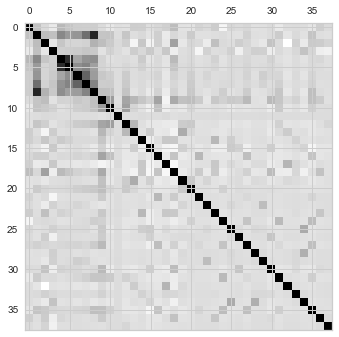

In [39]:
plt.matshow(df1.corr())
plt.show()

from the above correlation matrix we came to know that imdbRating is mostly correlated with [ratingCount,nrOfWins,nrOfNominations] in positive direction and with [year,SciFi] in the opposite direction

In [40]:
# count the number of missing values in each column
df1.isnull().sum(axis=0)

fn                     0
tid                    0
title                  0
wordsInTitle          13
url                    0
imdbRating          1210
ratingCount         1210
duration            1016
year                  30
type                   0
nrOfWins               0
nrOfNominations        0
nrOfPhotos             0
nrOfNewsArticles       0
nrOfUserReviews        0
nrOfGenre              0
Action                 0
Adult                  0
Adventure              0
Animation              0
Biography              0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Family                 0
Fantasy                0
FilmNoir               0
GameShow               0
History                0
Horror                 0
Music                  0
Musical                0
Mystery                0
News                   0
RealityTV              0
Romance                0
SciFi                  0
Short                  0
Sport                  0


[wordsInTitle ,imdbRating  ,ratingCount ,year] columns have missing values 

we may replace it with reasonable values

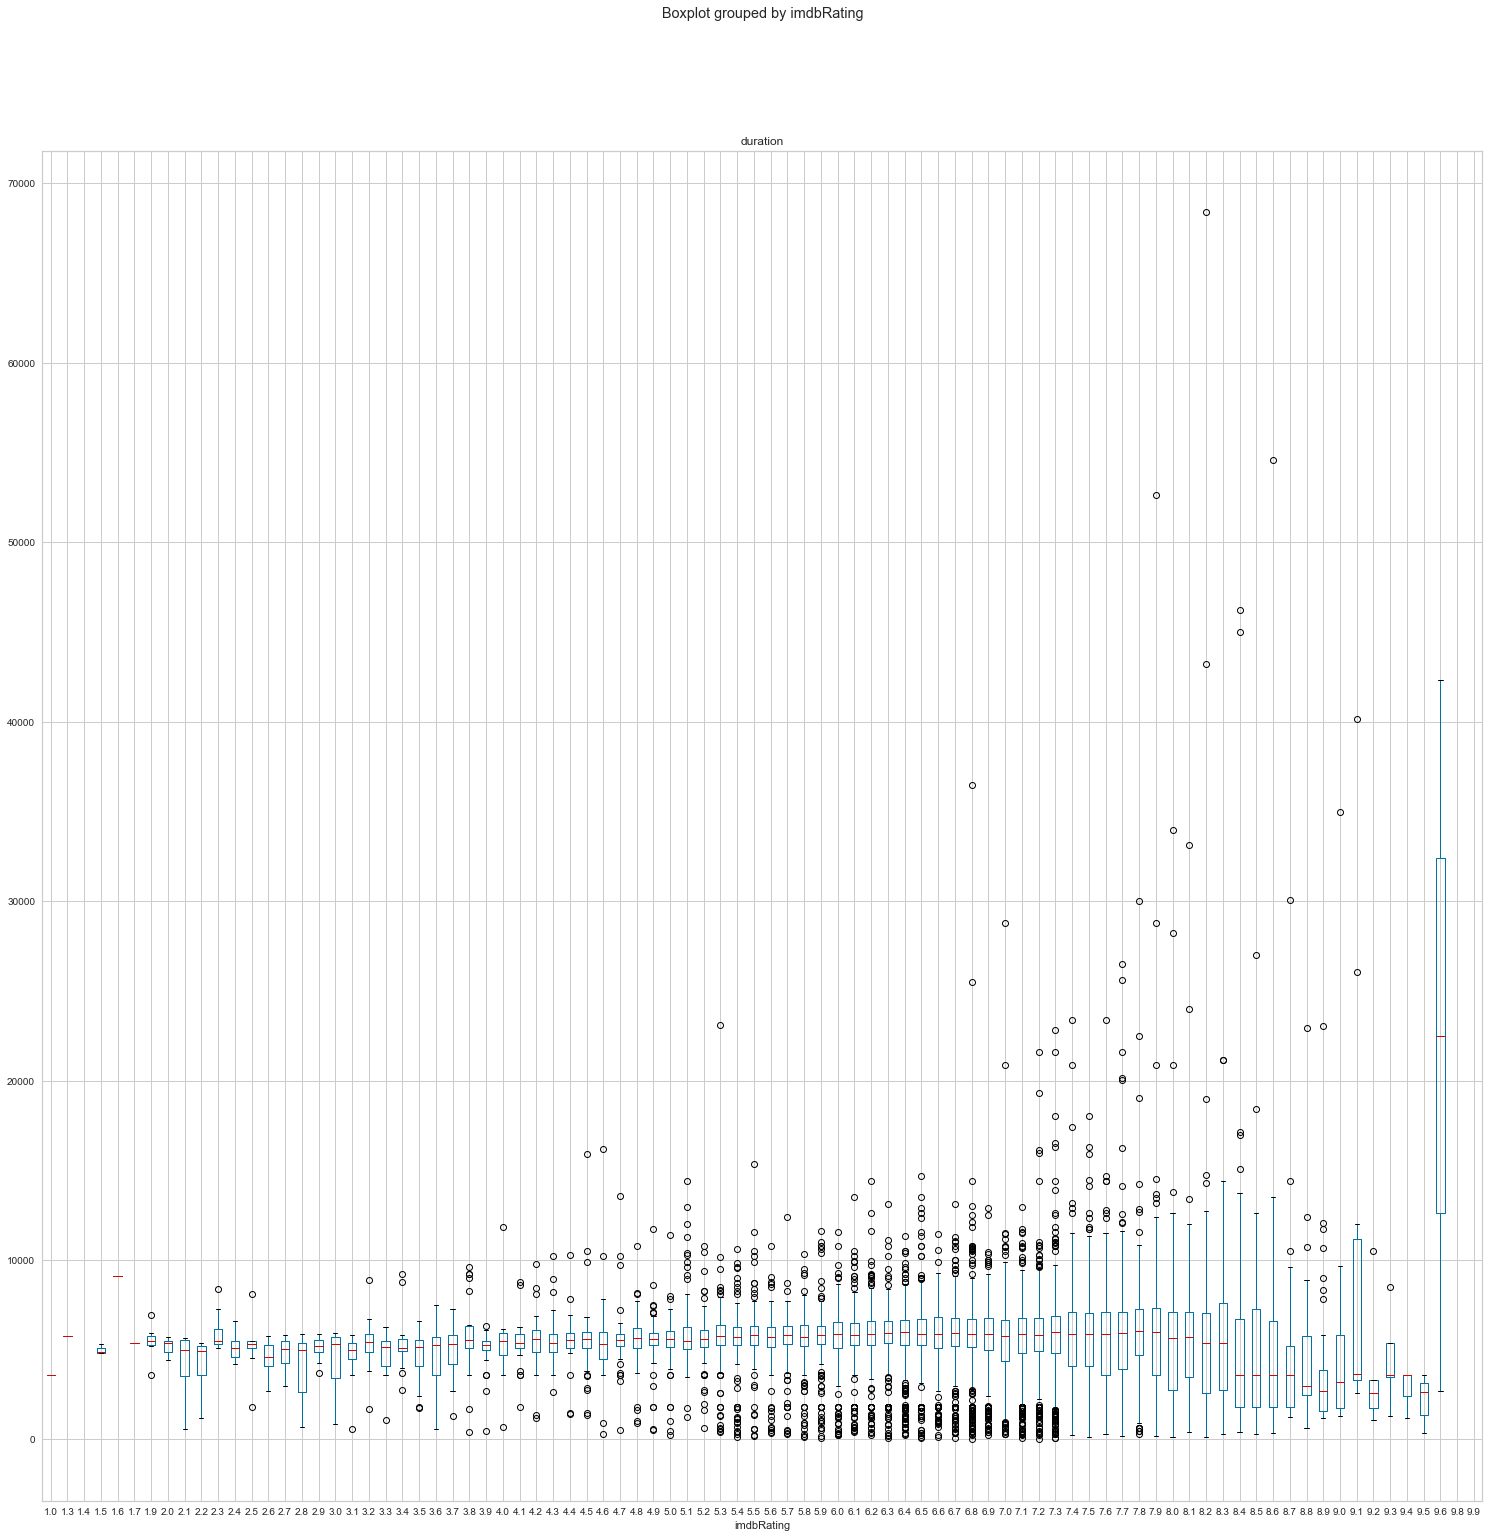

In [47]:
df1.boxplot(column='duration', by='imdbRating',figsize =(25,25))

This tells us that if the movie duration is between 3500 to 7000 it’s more likely to receive a rating.

In [50]:
final_list=[]
for i in range(len(df1)):
    
    temp_list_1=['Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western']
    temp_list_2=[]
    temp_var_1=df1.iloc[i]
    temp_var_2=temp_var_1[16:44]
    #print(i)
    #print('\n')
    #print(temp_var_2)
    for k,j in enumerate(temp_var_2):
        #print(j)
        #print(type(j))
        
        if j==1:
            temp_list_2.append(temp_list_1[k])
    #print(temp_list_2)
    final_list.append(temp_list_2)
    
    #print('\n')
    #df1['genere_combination_row_wise']=temp_list_2

In [51]:
df1['genere_combination_row_wise']=final_list

In [52]:
df1['genere_combination_row_wise']

0            [Comedy, Drama, Family]
1        [Adventure, Comedy, Family]
2                     [Drama, SciFi]
3        [Action, Adventure, Comedy]
4           [Comedy, Drama, Romance]
                    ...             
14756                       [Comedy]
14757         [Comedy, Crime, Drama]
14758                     [TalkShow]
14759                        [Drama]
14760             [Comedy, GameShow]
Name: genere_combination_row_wise, Length: 14761, dtype: object

In [77]:
df1.groupby(['year'])['genere_combination_row_wise'].sum()

year
1888.0             [Documentary, Short, Documentary, Short]
1890.0                                              [Short]
1893.0                                              [Short]
1894.0                                              [Short]
1899.0                             [Comedy, Romance, Short]
                                ...                        
2013.0    [Biography, Comedy, Crime, Adventure, Fantasy,...
2014.0    [Adventure, Animation, Comedy, Comedy, War, Co...
2015.0    [Adventure, Drama, Short, Action, Biography, D...
2016.0                           [Action, Adventure, Drama]
2017.0                         [Action, Adventure, Fantasy]
Name: genere_combination_row_wise, Length: 117, dtype: object

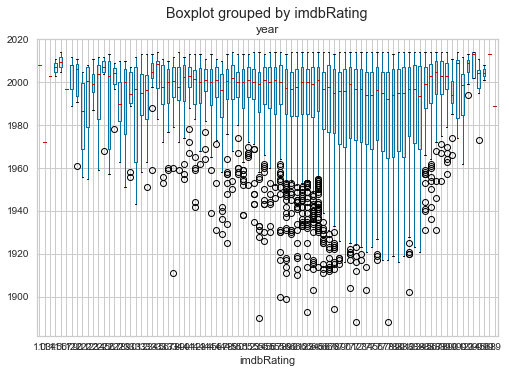

In [59]:
df1.boxplot(column='year', by='imdbRating')

movies released after 1990 are most which recieved the rating by the viewer

In [60]:
df1['len_of_char']=df1['title'].apply(lambda x:len(x.split(' (')[0]))

In [61]:
df1['len_of_char']

0        25
1        10
2        10
3        11
4        21
         ..
14756    20
14757    31
14758    50
14759    29
14760     7
Name: len_of_char, Length: 14761, dtype: int64

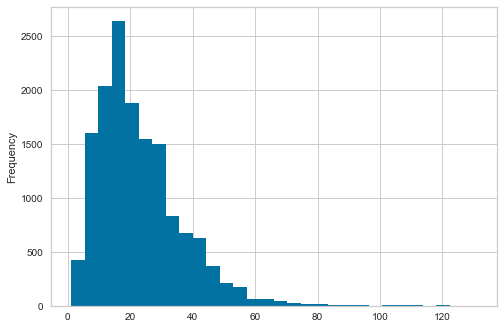

In [67]:
df1['len_of_char'].plot(kind='hist', bins=30)

most of the title lies in between char len of 15 to 30

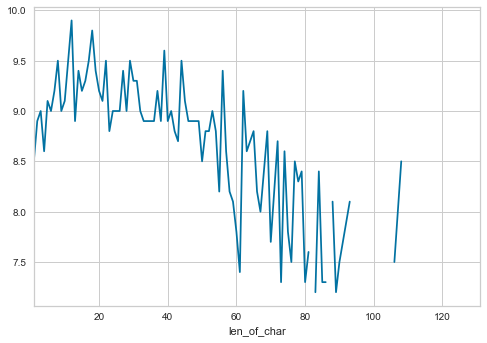

In [72]:
df1.groupby(['len_of_char'])['imdbRating'].max().plot()

maximum rating is given to movies having title length of 12 to 22

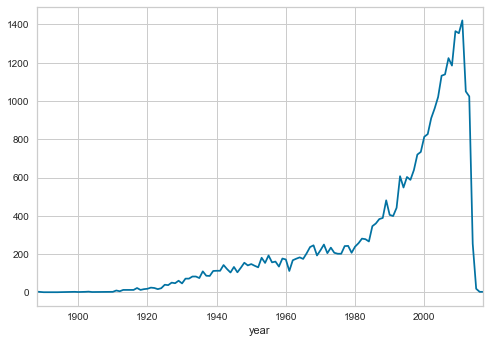

In [82]:
df1.groupby(['year'])['nrOfGenre'].sum().plot()

per year number of genere combination of movies is increasing

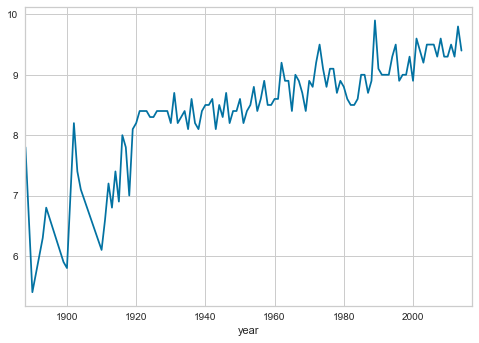

In [86]:
df1.groupby(['year'])['imdbRating'].max().plot()

maximum rating achieved by the movies year by year is increasing in nature

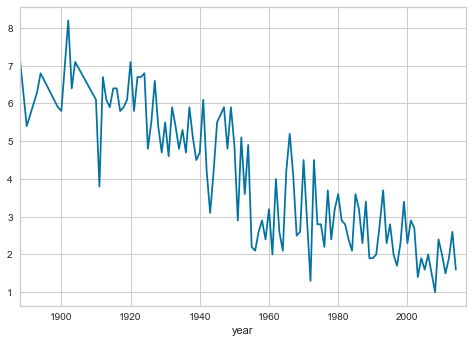

In [88]:
df1.groupby(['year'])['imdbRating'].min().plot()

minimum rating achieved by the movies year by year is decreasing in nature

In [90]:
df1.groupby(['year'])['imdbRating'].mean().describe()

count    114.000000
mean       6.969906
std        0.403407
min        5.400000
25%        6.782507
50%        6.972080
75%        7.194866
max        8.200000
Name: imdbRating, dtype: float64

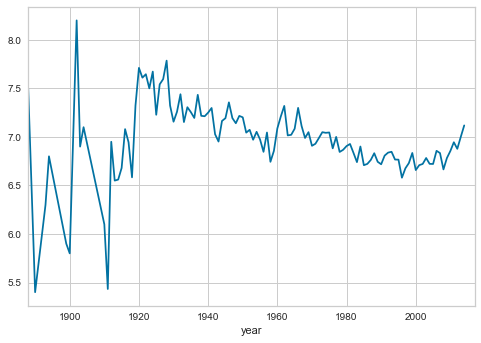

In [91]:
df1.groupby(['year'])['imdbRating'].mean().plot()

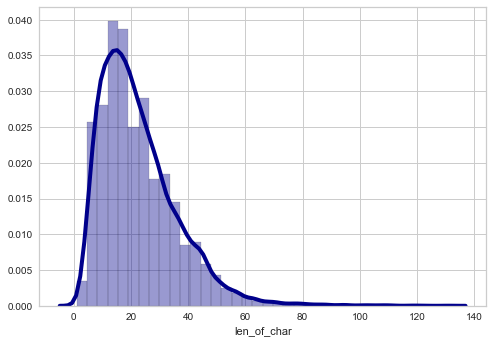

In [96]:

sns.distplot(df1['len_of_char'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

information from movie_metadata

In [106]:
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [102]:
df2.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [105]:
df2.shape

(5043, 28)

In [103]:
df2.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


mean duration is 107

mean facebook likes is 9699

mean number of users for review is 272

average imdb score is 6.44

In [6]:
df2.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


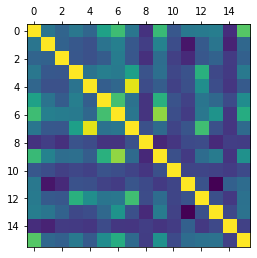

In [7]:
plt.matshow(df2.corr())
plt.show()

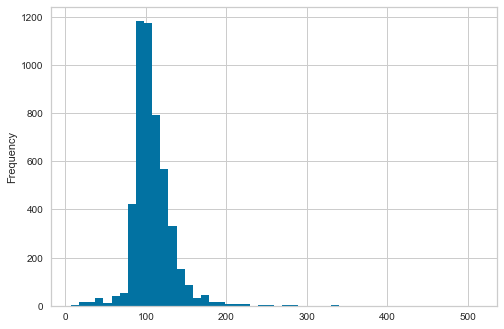

In [109]:
df2['duration'].plot(kind='hist', bins=50)

most of the movies duration lies between 90 to 160

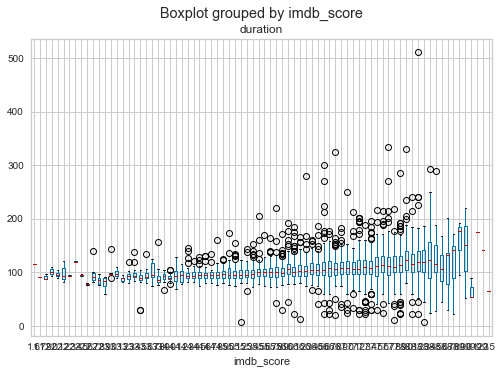

In [110]:
df2.boxplot(column='duration', by='imdb_score')

movies duration in between 90 to 150 is most likely got the rating by the user

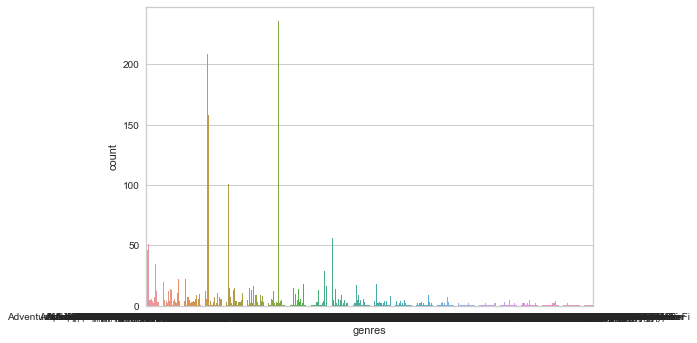

In [119]:
sns.countplot(x='genres', data=df2)

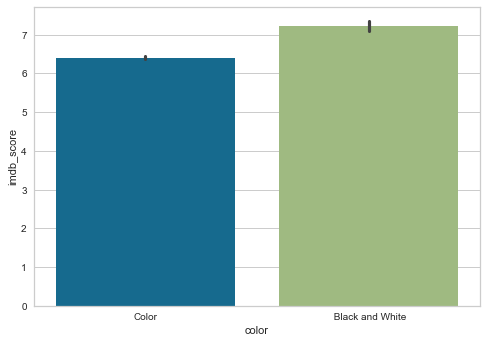

In [120]:
sns.barplot(x='color',y='imdb_score',data=df2)

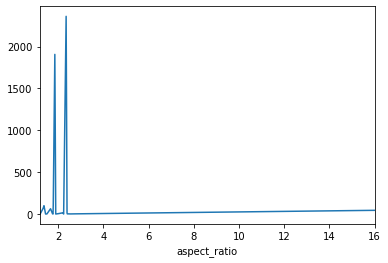

In [4]:
df2.groupby(['aspect_ratio'])['imdb_score'].count().plot()

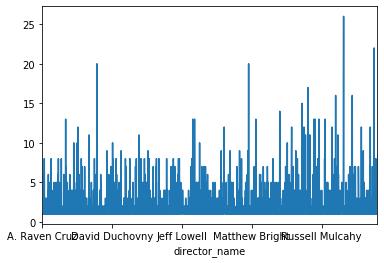

In [5]:
df2.groupby(['director_name'])['imdb_score'].count().plot()

some of the directors are very popular because most of the movies recieved higher rating.large spikes are showing them.

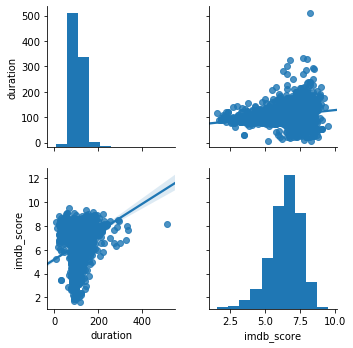

In [15]:
sns.pairplot(df2, vars=["duration", "imdb_score"],kind="reg")

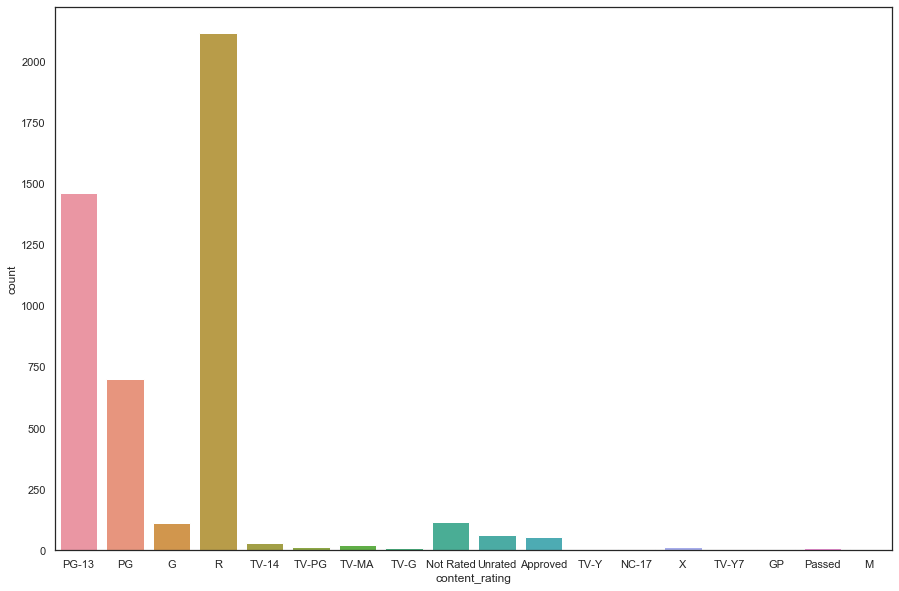

In [20]:
sns.set(style="white")
plt.figure(figsize=(15,10))
sns.countplot(x='content_rating',data=df2)

number count of content rating for [PG-13,PG,R] are quite high as with respect to others.so it will affect the rating mostly.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016927C90CC8>,
      dtype=object)

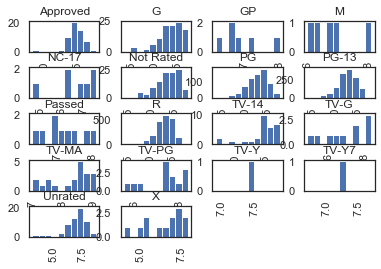

In [31]:
df2['imdb_score'].hist(by=df2['content_rating'])

we may visualize the data as much we want here but it depends upon the result that we want to achieve.
this is applicable for any data